In [7]:
# imports 

import pandas as pd

In [ ]:
# load data from metabolic panel csv

df = pd.read_csv('LSDS-8_Multiplex_serum_cardiovascular_EvePanel_TRANSFORMED_all_astronauts.csv')

In [9]:
# check for missing values

missing = df.isnull().sum()
missing = missing[missing > 0]
missing

Series([], dtype: int64)

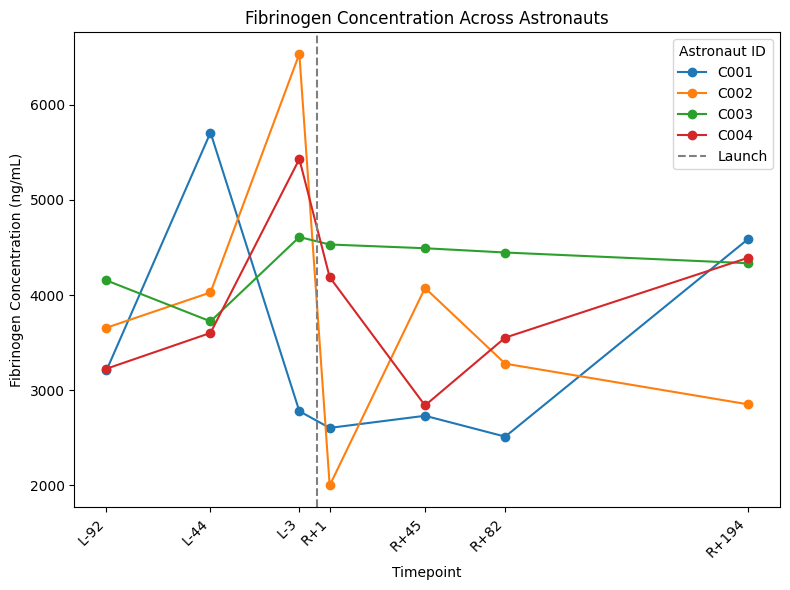

In [10]:
import matplotlib.pyplot as plt

# Map timepoints to numeric values
timepoint_mapping = {
    "L-92": -97,
    "L-44": -49,
    "L-3": -8,
    "R+1": 6,
    "R+45": 50,
    "R+82": 87,
    "R+194": 199
}

df["day"] = df["timepoint"].map(timepoint_mapping)

# -------------------------------
# Fibrinogen concentration plot
# -------------------------------
df_fibrinogen = df[
    ["astronautID", "day", "timepoint", "fibrinogen_concentration_nanogram_per_milliliter"]
].dropna()
df_fibrinogen = df_fibrinogen.sort_values(by=["astronautID", "day"])

plt.figure(figsize=(8,6))
for astro_id, sub_df in df_fibrinogen.groupby("astronautID"):
    plt.plot(
        sub_df["day"],
        sub_df["fibrinogen_concentration_nanogram_per_milliliter"],
        marker="o",
        label=astro_id
    )

plt.title("Fibrinogen Concentration Across Astronauts")
plt.xlabel("Timepoint")
plt.ylabel("Fibrinogen Concentration (ng/mL)")
plt.axvline(0, color="gray", linestyle="--", label="Launch")
plt.xticks(
    ticks=list(timepoint_mapping.values()),
    labels=list(timepoint_mapping.keys()),
    rotation=45,
    ha="right"
)
plt.legend(title="Astronaut ID")
plt.tight_layout()
plt.show()